<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

In [3]:
# Making non-binary values binary
yes_no_mapping = {'yes': 1, 'no': 0}
furnishing_mapping = {'furnished': 1, 'semi-furnished': 0, 'unfurnished': 0}
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnishing_columns = ['furnishingstatus']
housing[yes_no_columns] = housing[yes_no_columns].applymap(yes_no_mapping.get)
housing[furnishing_columns] = housing[furnishing_columns].applymap(furnishing_mapping.get)

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [5]:
#X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y1 = housing['price'].values.reshape(-1,1)
#y1 = housing['price']

In [6]:
print("nan:", housing.isna().sum().sum())

nan: 0


In [7]:
from sklearn.model_selection import train_test_split
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_val_scaled = scaler.transform(X1_val)

X_train_tensor = torch.tensor(X1_train_scaled, dtype = torch.float32)
X_val_tensor = torch.tensor(X1_val_scaled, dtype = torch.float32)

In [9]:
y_train_tensor = torch.tensor(y1_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y1_val, dtype=torch.float32)

Problem 1a: 1 hidden layer

In [10]:
model = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 1)
)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [11]:
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, y_train, X_val, y_val):
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.detach().item())
        val_losses.append(val_loss.detach().item())


        if epoch == 1 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {loss.item():.4f}, Validation loss {val_loss.item():.4f}")

    return train_losses, val_losses

# Model
train_losses1, val_losses1 = training_loop(
    n_epochs = 10000,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)

Epoch 1, Training loss 26469982011392.0000, Validation loss 25189244993536.0000
Epoch 100, Training loss 21783193321472.0000, Validation loss 20520875589632.0000
Epoch 200, Training loss 18019537387520.0000, Validation loss 16809793159168.0000
Epoch 300, Training loss 15039584010240.0000, Validation loss 13896290140160.0000
Epoch 400, Training loss 12670168203264.0000, Validation loss 11598460616704.0000
Epoch 500, Training loss 10779390640128.0000, Validation loss 9779099467776.0000
Epoch 600, Training loss 9265623334912.0000, Validation loss 8333530497024.0000
Epoch 700, Training loss 8049881776128.0000, Validation loss 7181168017408.0000
Epoch 800, Training loss 7070372331520.0000, Validation loss 6259530530816.0000
Epoch 900, Training loss 6278525485056.0000, Validation loss 5519922692096.0000
Epoch 1000, Training loss 5636039901184.0000, Validation loss 4924238200832.0000
Epoch 1100, Training loss 5112635850752.0000, Validation loss 4442565902336.0000
Epoch 1200, Training loss 468

Problem 1b: 2 hidden layers

In [12]:
model1 = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),
    nn.Tanh(),
    nn.Linear(64, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
)

In [13]:
optimizer1 = optim.SGD(model1.parameters(), lr=0.0001)


train_losses2, val_losses2 = training_loop(
    n_epochs = 10000,
    optimizer = optimizer1,  # Use the new optimizer
    model = model1,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)

Epoch 1, Training loss 26469979914240.0000, Validation loss 25189244993536.0000
Epoch 100, Training loss 15345863622656.0000, Validation loss 14213105844224.0000
Epoch 200, Training loss 9565589471232.0000, Validation loss 8540514156544.0000
Epoch 300, Training loss 6640594059264.0000, Validation loss 5692120367104.0000
Epoch 400, Training loss 5160458256384.0000, Validation loss 4266474602496.0000
Epoch 500, Training loss 4411464089600.0000, Validation loss 3556243144704.0000
Epoch 600, Training loss 4032449216512.0000, Validation loss 3204802936832.0000
Epoch 700, Training loss 3840657326080.0000, Validation loss 3032625446912.0000
Epoch 800, Training loss 3743603752960.0000, Validation loss 2949525798912.0000
Epoch 900, Training loss 3694493696000.0000, Validation loss 2910340775936.0000
Epoch 1000, Training loss 3669641396224.0000, Validation loss 2892549586944.0000
Epoch 1100, Training loss 3657065562112.0000, Validation loss 2884996431872.0000
Epoch 1200, Training loss 3650701754

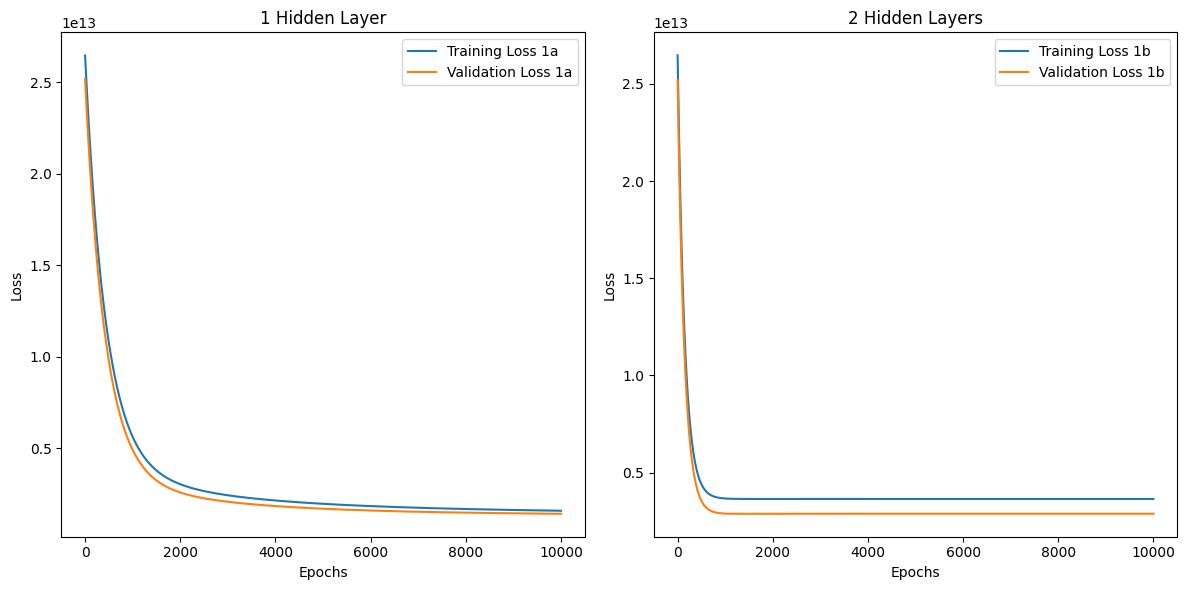

In [14]:
epochs = range(1, len(train_losses1) + 1)

plt.figure(figsize=(12, 6))

# Plot training losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses1, label='Training Loss 1a')
plt.plot(epochs, val_losses1, label='Validation Loss 1a')
plt.title('1 Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation losses
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses2, label='Training Loss 1b')
plt.plot(epochs, val_losses2, label='Validation Loss 1b')
plt.title('2 Hidden Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Problem 2

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Initialize the network and move it to the available device
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Load and normalize CIFAR-10 data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


Using device: cpu


100%|██████████| 170498071/170498071 [00:05<00:00, 29780459.75it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [18]:
start_time = time.time()
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')

end_time = time.time()
training_time = end_time - start_time
print('Finished Training. Training time: ', training_time)

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy} %')

Epoch 1, loss: 1.6450404712355138
Epoch 2, loss: 1.4809892927896977
Epoch 3, loss: 1.401661182629764
Epoch 4, loss: 1.3447678881949185
Epoch 5, loss: 1.2858535878518225
Epoch 6, loss: 1.24106322993055
Epoch 7, loss: 1.1963390071997047
Epoch 8, loss: 1.1579153942999243
Epoch 9, loss: 1.1214503677567467
Epoch 10, loss: 1.0817434593723714
Epoch 11, loss: 1.0435266318275034
Epoch 12, loss: 1.0173988124132716
Epoch 13, loss: 0.9802248175590764
Epoch 14, loss: 0.9571358888267726
Epoch 15, loss: 0.9154982296843431
Epoch 16, loss: 0.8945602454876295
Epoch 17, loss: 0.8668332828977029
Epoch 18, loss: 0.8601123461402714
Epoch 19, loss: 0.8108105059222993
Epoch 20, loss: 0.7821547038235306
Epoch 21, loss: 0.7891669608302665
Epoch 22, loss: 0.7483173753793212
Epoch 23, loss: 0.7434976395651248
Epoch 24, loss: 0.7059736113932484
Epoch 25, loss: 0.7024273972916719
Epoch 26, loss: 0.6744629819508992
Epoch 27, loss: 0.6583354189355057
Epoch 28, loss: 0.6748277863641958
Epoch 29, loss: 0.64088471960196

In [19]:
class ExtendedNet(nn.Module):
    def __init__(self):
        super(ExtendedNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)  # First additional hidden layer
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 128)  # Second additional hidden layer
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

In [1]:
from torch.optim.lr_scheduler import StepLR
# Initialize the extended network
extended_net = ExtendedNet().to(device)
optimizer = optim.SGD(extended_net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

start_time = time.time()
for epoch in range(300):  # Train for 300 epochs
    scheduler.step()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = extended_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')

end_time = time.time()
training_time = end_time - start_time
print('Finished Training. Training time: ', training_time)

# Evaluate the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = extended_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy} %')


NameError: ignored